In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install wordcloud

## 1. Reading the data 

We would be first reading the data that is present in the kaggle repository to ensure that we work with it. 

In [2]:
df = pd.read_csv('train.csv')

Reading the head of the dataframe, we see that there are different columns such as textID, text, selected_text and the output that we are going to be predict which is sentiment respectively. 

In [3]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


We would be dropping the selected text as the test set does not contain those values. It would be good to leave only the text for the machine learning models for predictions respectively. 

In [4]:
df.drop(['selected_text'], axis = 1, inplace = True)

Since we have removed the selected text, we are only left with the actual text values along with the sentiment whether it is positive, negative or neutral output respectively.

In [5]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


## 2. Distribution of the Sentiment 


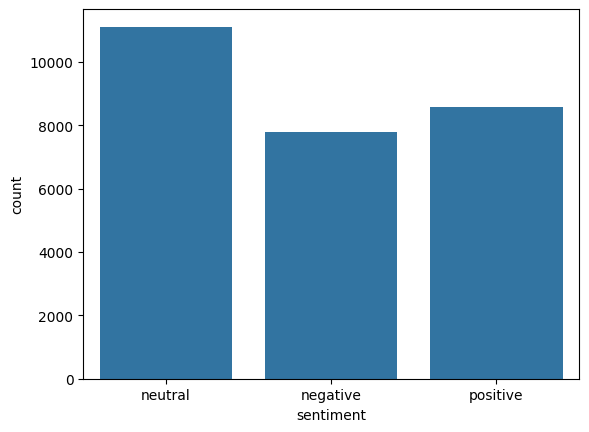

In [6]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

In [7]:
df.shape

(27481, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [9]:
df.dropna(inplace = True)

In [10]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [11]:
df.head()

,textID,text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [12]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [13]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [14]:
positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']

In [15]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11117, 5)


In [16]:
wordcloud = WordCloud(width = 500, height = 500)

In [17]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [18]:
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [19]:
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])

In [20]:
positive_text[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

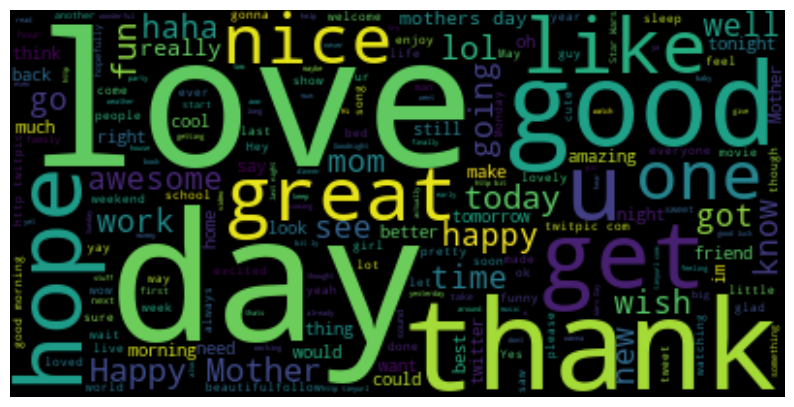

In [21]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Convert stopwords to a set of lowercased words
stopwords_set = set(stopwords.words('english'))

# Assuming 'positive_text' is a list of strings
wordcloud = WordCloud(stopwords=stopwords_set)

# Join all positive text into a single string for wordcloud generation
wordcloud.generate(''.join(positive_text))

# Display the wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [22]:
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])

In [23]:
negative_text[0: 5]

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'My Sharpie is running DANGERously low on ink']

## 4. Negative Text WordCloud 


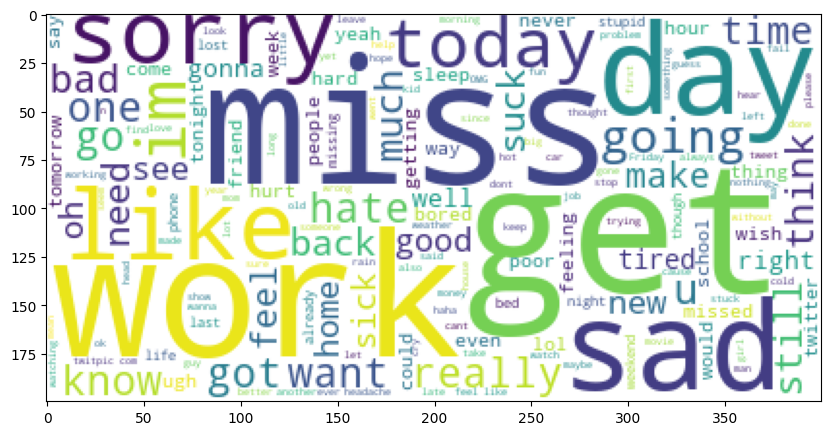

In [24]:
wordcloud = WordCloud(stopwords = stopwords_set, background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [25]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [26]:
negative_df.head()

,textID,text,sentiment,text_length,text_words
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,44,8


In [27]:
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


## 5. List of Stopwords


In [28]:

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [29]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [30]:
df.drop(['textID'], axis = 1, inplace = True)

In [31]:
X = df.drop(['sentiment'], axis = 1)
y = df['sentiment']

## 6. Dividing the Data into Training and Cross Validation Data 


In [32]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [33]:
X_train.shape

(19236, 3)

In [34]:
X_cv.shape

(8244, 3)

## 7. Function for Replacing Words


In [35]:

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [36]:
!pip install tqdm

## 8. Preprocessing the Text 


In [37]:
from tqdm import tqdm
preprocessed_text = []

for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 19236/19236 [00:00<00:00, 43502.58it/s]


In [38]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]

In [39]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [40]:

from tqdm import tqdm
preprocessed_text = []

for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 8244/8244 [00:00<00:00, 42545.20it/s]


In [41]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]

In [42]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [43]:
binarizer_ytrain = LabelBinarizer()
y_train_converted = binarizer_ytrain.fit_transform(y_train)
binarizer_ycv = LabelBinarizer()
y_cv_converted = binarizer_ycv.fit_transform(y_cv)

In [44]:
import joblib
joblib.dump(binarizer_ytrain, 'binarizer_ytrain.pkl')
joblib.dump(binarizer_ycv, 'binarizer_ycv.pkl')

['binarizer_ycv.pkl']

In [45]:
y_cv_converted

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

## 9. Tfidf Vectorizer


In [46]:
tfidf_vectorizer = TfidfVectorizer()
X_train_text = tfidf_vectorizer.fit_transform(X_train['text'])
X_cv_text = tfidf_vectorizer.transform(X_cv['text'])

In [47]:
import joblib
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [48]:
X_train_text.shape

(19236, 20619)

In [49]:
X_train_text[0: 5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31 stored elements and shape (5, 20619)>

## 10. Neural Network Model for Prediction 
 

In [50]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [51]:
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [52]:
y_train

19832    negative
10340    negative
11044    positive
14088    negative
20333     neutral
           ...   
15650    positive
22638    positive
10124    positive
5601     positive
14001    negative
Name: sentiment, Length: 19236, dtype: object

In [53]:
encoder_ytrain = LabelEncoder()
y_train_converted = encoder_ytrain.fit_transform(y_train)

In [54]:
y_train_converted

array([0, 0, 2, ..., 2, 2, 0])

In [55]:
y_train_final = to_categorical(y_train_converted)

In [56]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [57]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [58]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [59]:
X_train['text'].head()

19832          24 hours since dog put sleep rip old friend
10340                        not feeling comfortable today
11044             hurray twin girls born beautiful may day
14088                                        bah h8 waking
20333    textmate crashed first time 3 months not bad a...
Name: text, dtype: object

In [60]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [61]:
X_train_dropped.head()

,text_length,text_words
19832,78,18
10340,41,6
11044,48,9
14088,19,5
20333,80,14


In [62]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [63]:
X_cv_dropped = X_cv.drop(['text'], axis = 1)

In [64]:
X_cv_dropped.head()

,text_length,text_words
7214,38,8
19840,67,11
19409,102,19
6600,25,5
7807,78,14


In [65]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)

In [66]:
joblib.dump(scaler, 'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [67]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [68]:
X_cv_final[0: 5]

array([[0.25362319, 0.22580645],
       [0.46376812, 0.32258065],
       [0.7173913 , 0.58064516],
       [0.15942029, 0.12903226],
       [0.54347826, 0.41935484]])

In [69]:
encoder_ycv = LabelEncoder()
y_cv_encoded = encoder_ycv.fit_transform(y_cv)

In [70]:
joblib.dump(encoder_ytrain, 'encoder_ytrain.pkl')
joblib.dump(encoder_ycv, 'encoder_ycv.pkl') 

['encoder_ycv.pkl']

In [71]:
y_train_final = to_categorical(y_train_converted)
y_cv_final = to_categorical(y_cv_encoded)

In [72]:
y_train_final[0: 5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [73]:
y_cv_final[0: 5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [74]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [75]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


## 11. Count Vectorizer


In [76]:
count_vectorizer = CountVectorizer()
X_train_vectorized = count_vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = count_vectorizer.transform(X_cv['text'])

In [77]:
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [78]:
X_train_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 135844 stored elements and shape (19236, 20619)>

In [79]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [80]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()

In [81]:
X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

## 12. Neutral Network Model 

We would now be using the deep neural networks that we are going to be learning and ensure that we are getting the best predictions respectively. We would start with 100 neutrons from the first layer and followed by 25 neutrons in the second layer and 10 units in the third layer followed by 3 final layers which we are going to be using the softmax classifier for predictions respectively. 

In [82]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')



In [83]:
model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))

Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.4853 - loss: 0.9976 - val_accuracy: 0.6863 - val_loss: 0.7568
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.7166 - loss: 0.6849 - val_accuracy: 0.6901 - val_loss: 0.7297
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8032 - loss: 0.5123 - val_accuracy: 0.6881 - val_loss: 0.7946
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8616 - loss: 0.3822 - val_accuracy: 0.6847 - val_loss: 0.9118
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8931 - loss: 0.2930 - val_accuracy: 0.6796 - val_loss: 1.0571
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9192 - loss: 0.2323 - val_accuracy: 0.6716 - val_loss: 1.1480
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9356 - loss: 0.1924 - val_accuracy: 0.6705 - val_loss: 1.3532
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9513 - loss: 0.1530 - 

In [84]:
model.save("sentiment_model.keras") 

## 13. Plots of the Results 


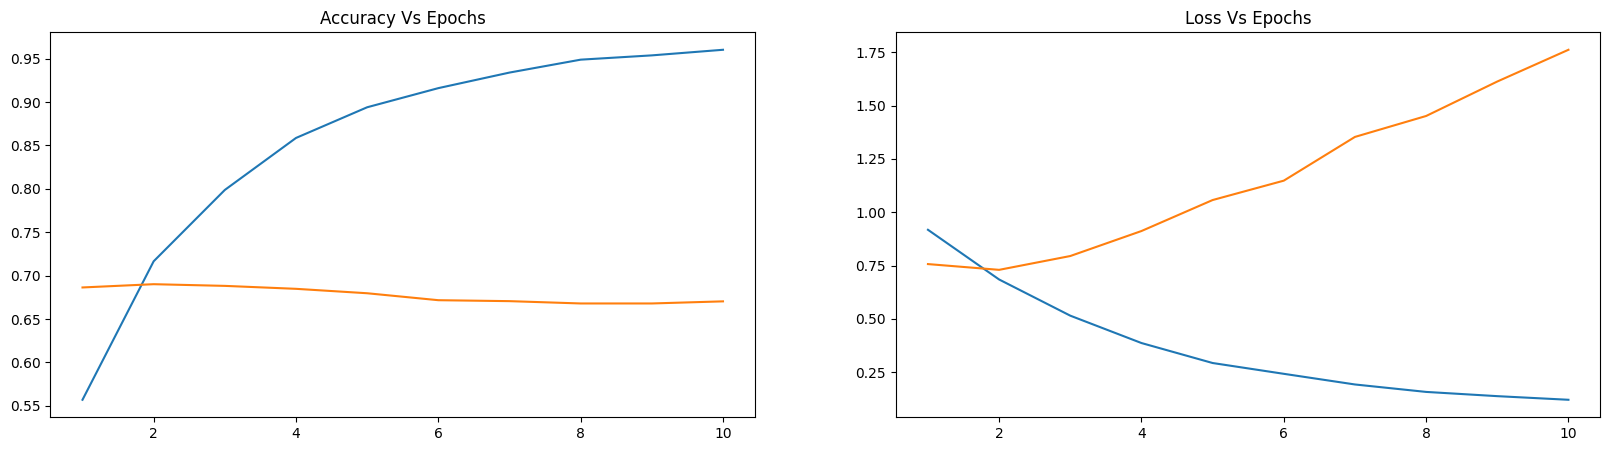

In [85]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = np.arange(1, 11)
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

sns.lineplot(x = epochs, y = accuracy, ax = ax[0])
sns.lineplot(x = epochs, y = val_accuracy, ax = ax[0])
ax[0].set_title('Accuracy Vs Epochs')
sns.lineplot(x = epochs, y = loss, ax = ax[1])
sns.lineplot(x = epochs, y = val_loss, ax = ax[1])
ax[1].set_title('Loss Vs Epochs')
plt.show()

In [86]:
import tensorflow as tf
import keras
print(f"Training environment: TensorFlow version: {tf.__version__}")
print(f"Training environment: Keras version: {keras.__version__}")

Training environment: TensorFlow version: 2.19.0
Training environment: Keras version: 3.9.1


In [87]:
model.save("sentiment_model.keras")

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import nltk 
import string
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_scoreW
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")


# 1. Dataset

In [2]:
df = pd.read_csv('text_emotions.csv')
df

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [3]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
Y = df['sentiment']


Dataset size: (20000, 2)
Columns are: Index(['content', 'sentiment'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    20000 non-null  object
 1   sentiment  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


## Dataset Emotion Analysis

<Axes: xlabel='sentiment', ylabel='count'>

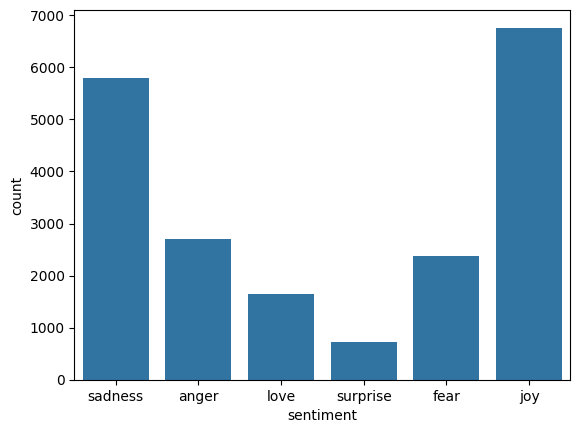

In [5]:
sns.countplot(x = 'sentiment', data = df)

# 2. Pre-processing text data
    1. Remove punctuations
    2. Tokenization - Converting a sentence into list of words
    3. Remove stopwords
    4. Lammetization/stemming - Tranforming any form of a word to its root word

## 2.1 Remove Punctuations

In [6]:
emojis = pd.read_csv('emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])}
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text):
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

def remove_punct(text):
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

,content,sentiment,Tweet_punct
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too


## 2.2 Tokenization

In [7]:
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)
    
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]"


## 2.3 Remove Stopwords

In [8]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
                ,'brother','dad','basic','im'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[taking, milligrams, times, recommended, amoun..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[confused, life, teenager, jaded]"
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]",[romantic]


## 2.4 Lemmatization

In [10]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to C:\Users\User/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


## Token Frequency in a sentence after preprocessing

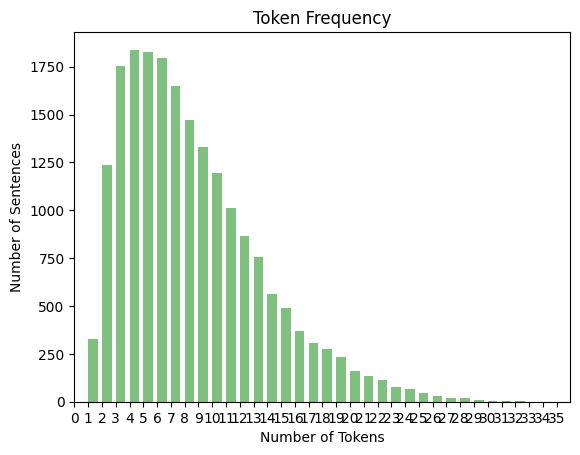

In [11]:
token_lengths = [len(t) for t in df['Tweet_lemmatized']]
plt.hist(token_lengths,bins=33,width = 0.7, fc="green",alpha=0.5)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.title('Token Frequency')
x_Values = [i for i in range(36)] 
plt.xticks(x_Values)
plt.xlim(0,36)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

## All in one (Text preprocessing)

In [12]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

# 3. Feature Extraction
    1. Count Vectorizer
    2. TF-IDF (Term Frequency and Inverse Document Frequency)

Vocabulary:  {'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
Encoded Document is:
[[1 1 0 2 0 1 1]
 [0 0 1 1 1 1 0]]
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

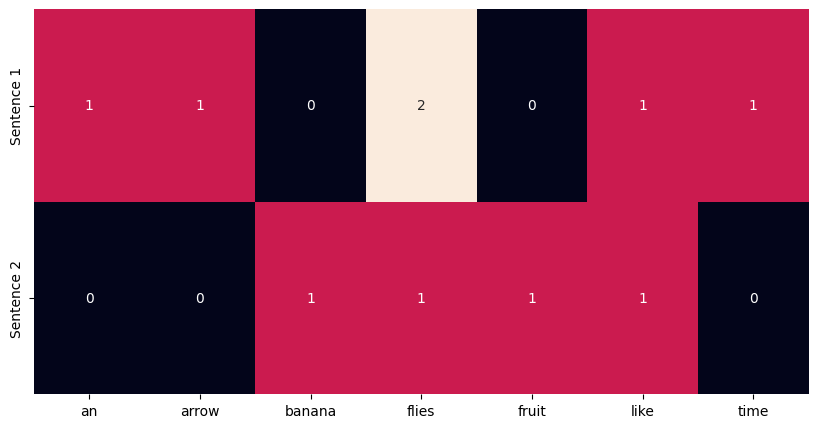

In [13]:
document = ["Time flies flies like an arrow",
            "Fruit flies like a banana"]
  
count_vectorizer_em = CountVectorizer()
  
count_vectorizer_em.fit(document)
  
print("Vocabulary: ", count_vectorizer_em.vocabulary_)
  
vector = count_vectorizer_em.transform(document)
  
print("Encoded Document is:")
print(vector.toarray())

dictionary = sorted(count_vectorizer_em.vocabulary_)

print(dictionary)

sns.heatmap(vector.toarray(), annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1','Sentence 2'])

## 3.2 TF-IDF

[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


<Axes: >

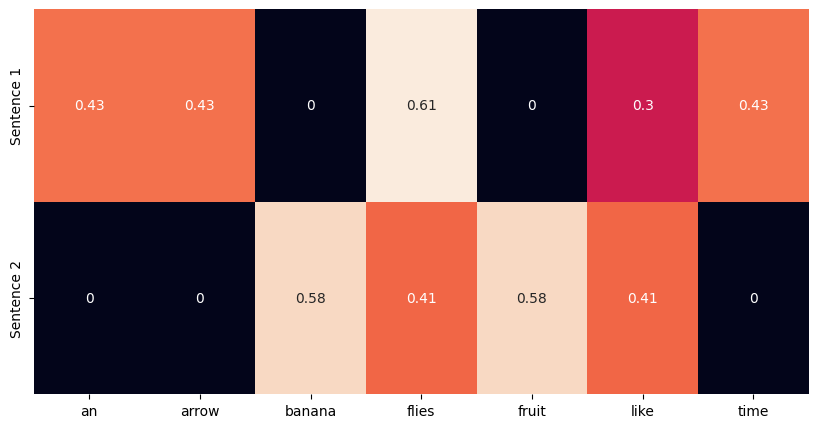

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

document = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer_em = TfidfVectorizer()
tfidf = tfidf_vectorizer_em.fit_transform(document).toarray()
print (tfidf)

print (tfidf_vectorizer_em.vocabulary_)

dictionary = sorted(tfidf_vectorizer_em.vocabulary_)

print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

In [15]:
joblib.dump(tfidf_vectorizer_em, "tfidf_vectorizer_em.pkl")

['tfidf_vectorizer_em.pkl']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size=0.3, random_state = 0)

In [17]:
countVectorizer1 = CountVectorizer(analyzer=clean_text)
countVector1 = countVectorizer1.fit_transform(X_train)

countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

joblib.dump(countVectorizer1, "count_vectorizer_em.pkl")


['count_vectorizer_em.pkl']

In [18]:
joblib.dump(tfidf_transformer_xtrain, "tfidf_transformer_em.pkl")

['tfidf_transformer_em.pkl']

In [19]:
svm = SGDClassifier()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_test, y_pred, average='macro')
svm_recal = recall_score(y_test, y_pred, average='macro')
svm_cm = confusion_matrix(y_test,y_pred)
svm_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(svm_acc*100))
print('Precision:', '{0:.3f}'.format(svm_prec*100))
print('Recall:', '{0:.3f}'.format(svm_recal*100))
print('F1-score:', '{0:.3f}'.format(svm_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 89.500
Precision: 88.458
Recall: 83.557
F1-score: 85.720
              precision    recall  f1-score   support

       anger       0.91      0.86      0.88       828
        fear       0.89      0.84      0.86       741
         joy       0.89      0.95      0.92      2019
        love       0.84      0.76      0.80       484
     sadness       0.91      0.95      0.93      1715
    surprise       0.87      0.67      0.76       213

    accuracy                           0.90      6000
   macro avg       0.88      0.84      0.86      6000
weighted avg       0.89      0.90      0.89      6000



### 4.1.1 Confusion Matrix

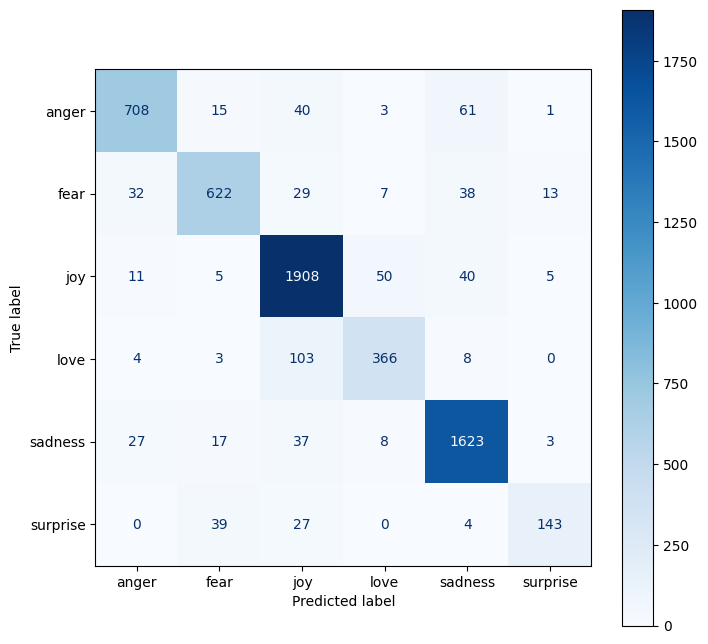

In [20]:
cm_display_svm = ConfusionMatrixDisplay(svm_cm, display_labels=svm.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_svm.plot(ax=ax,cmap='Blues')

In [21]:
import joblib

# Save the trained SVM model
joblib.dump(svm, "svm_emotion_model.pkl")


['svm_emotion_model.pkl']

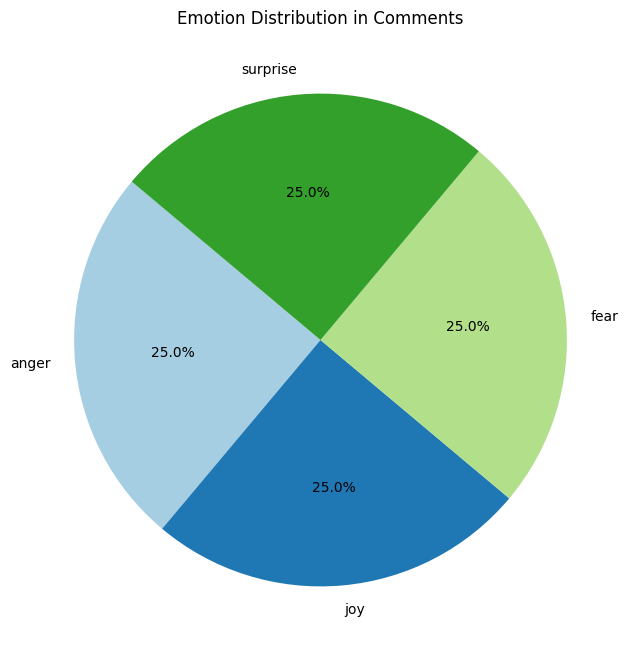

In [23]:

import joblib
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def predict_emotions(comments):
    """Load the trained model, CountVectorizer, and TfidfTransformer, then predict emotions."""
    model = joblib.load("svm_emotion_model.pkl")  # Load trained model
    countVectorizer = joblib.load("count_vectorizer_em.pkl")  # Load CountVectorizer
    tfidf_transformer = joblib.load("tfidf_transformer_em.pkl")  # Load TfidfTransformer
    
    X_counts = countVectorizer.transform(comments)  # Do NOT call fit_transform()
    
    X_tfidf = tfidf_transformer.transform(X_counts)  # Do NOT call fit_transform()
    
    predictions = model.predict(X_tfidf)
    
    emotion_counts = Counter(predictions)
    total_comments = len(comments)
    
    emotion_percentages = {label: (count / total_comments) * 100 for label, count in emotion_counts.items()}
    return emotion_percentages


def plot_emotion_pie_chart(emotion_percentages):
    """Plot a pie chart of emotion distribution."""
    labels = list(emotion_percentages.keys())
    sizes = list(emotion_percentages.values())
    
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title("Emotion Distribution in Comments")
    plt.show()

# Example usage
new_comments = [
   "I am so angry at everything",
"I love this song!",
"I'm terrified of the dark",
"You surprised me with that gift!"

]

emotion_percentages = predict_emotions(new_comments)
plot_emotion_pie_chart(emotion_percentages)
